In [ ]:
import piplite
await piplite.install("pytest")
await piplite.install("hypothesis")

<br><br><br>

## Old trigonometry

In [ ]:
from my_cool_package import oldtrig as old

<br><br><br><br><br>

This is a very useful package that renames `sin` and `cos` as "sine" and "cosine" and uses degrees, rather than radians.

In [ ]:
old.sine(30)

In [ ]:
old.cosine(60)

<br><br><br><br><br>

It also defines some other functions that aren't often used anymore.

In [ ]:
old.versine(60)

In [ ]:
old.coversine(30)

In [ ]:
old.vercosine(60)

In [ ]:
old.covercosine(30)

In [ ]:
old.haversine(60)

In [ ]:
old.hacoversine(30)

In [ ]:
old.havercosine(60)

In [ ]:
old.hacovercosine(30)

In [ ]:
old.exsecant(60)

<br><br><br><br><br>

In [ ]:
%%html
<div style="overflow: hidden;"><iframe src="/my-cool-package/files/angles/demo.html" width="840" height="440" scrolling="no"></div>

<br><br><br><br><br>

## How do we test it?

In general, a test runs a function and compares its result to an expected value.

How about this?

In [ ]:
import math

In [ ]:
assert old.sine(30) == math.sin(30 * math.pi / 180)

<br><br><br><br><br>

It works!

... But it's not any different from the implementation itself.

In [ ]:
import inspect

In [ ]:
print(inspect.getsource(old.sine))

Does it make any sense to have tests like the following?

In [ ]:
assert old.sine(30) == old.sine(30)

<br><br><br><br><br>

It does, a little bit.

Although it can't tell you if `old.sine(30)` is returning the wrong value, it _is_ telling you that it runs without errors.

It's equivalent to this test:

In [ ]:
ignore = old.sine(30)

which isn't nothing.

<br><br><br><br><br>

One way to make the test better: compare it to a fixed value.

In [ ]:
assert old.sine(30) == 0.5

Or maybe

In [ ]:
import pytest

In [ ]:
assert old.sine(30) == pytest.approx(0.5)

<br><br><br><br><br>

This encodes our expectation, and it's independent of implementation (which would have different round-off errors).

One value isn't enough. Let's do a few, in qualitatively different regions of the circle.

In [ ]:
argument_expectation_pairs = [
    (-10, -0.17364817766693033),  # a negative value
    (0, 0),                       # 0°
    (10, 0.17364817766693033),    # a little above 0°
    (30, 0.5),                    # special angle 30°
    (45, 1 / math.sqrt(2)),       # special angle 45°
    (60, math.sqrt(3) / 2),       # special angle 60°
    (80, 0.984807753012208),      # a little below 90°
    (90, 1),                      # 90°
    (100, 0.984807753012208),     # a little above 90°
    (180, 0),                     # 180°
    (270, -1),                    # 270°
    (360, 0),                     # 360°
    (370, 0.17364817766693033),   # a little above 360°
]

for θ, expected in argument_expectation_pairs:
    assert old.sine(θ) == pytest.approx(expected)

<br><br><br><br><br>

Now what about the weird values like infinity and not-a-number?

In [ ]:
assert math.isnan(old.sine(math.nan))

In [ ]:
try:
    old.sine(math.inf)
except ValueError:
    pass                   # we expect this case to raise a ValueError
else:
    raise AssertionError   # it's a problem if it doesn't!

<br><br><br><br><br>

How did I get expected values for generic values, like `old.sine(10)`?

Answer: I computed them and pasted the values in.

Isn't this cheating?

<br><br><br><br><br>

This method does _not_ verify that `old.sine(10) == 0.17364817766693033` is correct.

But it _does_ verify that the value does not change.

Sometimes, that's all you need.

<br><br><br><br><br>

**How I like to think about it:**

You're building a balsa wood airplaine and you've finished some pieces but not others.

To keep the finished pieces from moving, you hold them in place with pins.

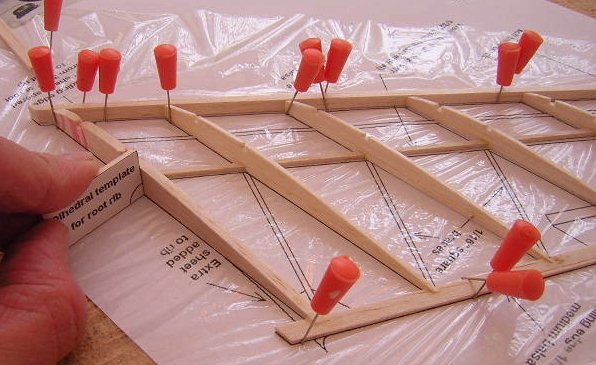

(Credit: [Build your first flying scale Jet](http://www.ffscale.co.uk/f84d.htm))

<br><br><br><br><br>

## Property-based testing

Sometimes, we can do better, if we can identify any invariants of the functions we want to test.

For sine and cosine,

$$(\sin \theta)^2 + (\cos \theta)^2 = 1$$

In [ ]:
import random

In [ ]:
random.uniform(-370, 370)

In [ ]:
θ = random.uniform(-370, 370)
assert old.sine(θ)**2 + old.cosine(θ)**2 == pytest.approx(1)

In [ ]:
for _ in range(1000):
    θ = random.uniform(-370, 370)
    assert old.sine(θ)**2 + old.cosine(θ)**2 == pytest.approx(1)

These trigonometry functions have a lot of invariants, but I'll only use this one for the purposes of illustration.

<br><br><br><br><br>

Before you put randomized tests in our test suite, what would you do if a randomized test fails?

How would you debug it, if the test depends on a random value?

<br><br><br><br><br>

Maybe ensure that the value gets printed before testing?

(What if the test depends on a lot of random values? This "old trigonometry" example is a very simple codebase.)

<br><br><br><br><br>

Randomly select a set of values once and re-use that set?

This is a good one: it's called setting a random seed.

In [ ]:
random.seed(12345)

random.uniform(-370, 370)

<br><br><br><br><br>

## Hypothesis

Hypothesis is a library for property-based testing. It generates test examples that are likely to be problematic.

In [ ]:
import hypothesis
from hypothesis import given, strategies

In [ ]:
hypothesis.seed(12345)

@given(θ=strategies.floats())
def test_property(θ):
    print(θ)
    assert old.sine(θ)**2 + old.cosine(θ)**2 == pytest.approx(1)

test_property()

<br><br><br><br><br>

See also:

In [ ]:
hypothesis.seed(12345)

@given(x=strategies.booleans(), y=strategies.booleans(), z=strategies.booleans())
def just_print(x, y, z):
    print(x, y, z)

just_print()

In [ ]:
hypothesis.seed(12345)

@given(x=strategies.integers())
def just_print(x):
    print(x)

just_print()

In [ ]:
hypothesis.seed(12345)

@given(x=strategies.text())
def just_print(x):
    print(x)

just_print()

In [ ]:
hypothesis.seed(12345)

@given(x=strategies.datetimes())
def just_print(x):
    print(x)

just_print()

In [ ]:
hypothesis.seed(12345)

@given(x=strategies.ip_addresses())
def just_print(x):
    print(x)

just_print()

And similarly for many types.

Notice that they're not uniformly random: they're biased toward common and problematic values.

<br><br><br><br><br>

## Let's see those tests!

* [tests/test_0001_oldtrig.py](tests/test_0001_oldtrig.py)
* [tests/test_0002_oldtrig_hypothesis.py](tests/test_0002_oldtrig_hypothesis.py)
* [tests/conftest.py](tests/conftest.py) _(optional)_

<br><br><br><br><br>

Why is it numbered?

I personally encourage naming test files with increasing numbers to see at a glance when a batch of tests were added,

* because it helps to know what part of a project's life-cycle they're intended to test,
* even better if the number is the GitHub issue or PR number,
* to get used to thinking of tests as a "pile of stuff," rather than carefully organized code. You want to be psychologically ready to add any test at any time, without worrying about organizing it.

See [what this looks like in a big codebase](https://github.com/scikit-hep/awkward/tree/main/tests).

<br><br><br><br><br>

Now let's run it. Normally, you'd do this on the terminal with

```bash
pytest
```

or

```bash
pytest -v tests
```

but we're in JupyterLite (no terminal).

In [ ]:
pytest.main(["-v", "tests/test_0001_oldtrig.py", "tests/test_0002_oldtrig_hypothesis.py"])